## k-최근접 분류

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fish = pd.read_csv('Data/Fish.csv')
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

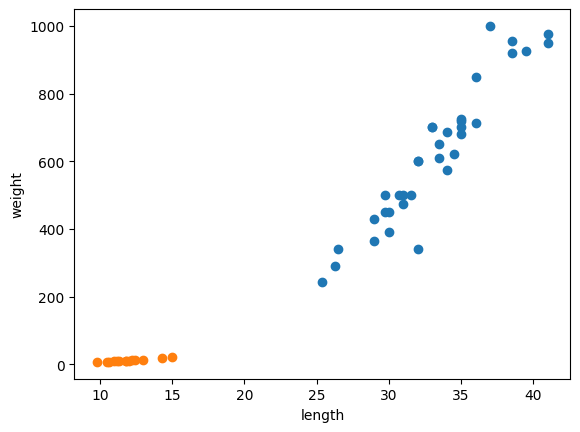

In [4]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [5]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [6]:
zip(length, weight)

In [7]:
fish_data = [[l, w] for l, w in zip(length, weight)]
fish_data[:3]

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0]]

In [8]:
len(bream_length), len(smelt_length)

(35, 14)

In [9]:
fish_target = [1] * len(bream_length) + [0] * len(smelt_length)
fish_target[:3]

[1, 1, 1]

In [10]:
from sklearn import neighbors
kn = neighbors.KNeighborsClassifier()   # default: n=5
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [11]:
kn.score(fish_data, fish_target)

1.0

In [12]:
kn.predict([[30, 600]])

array([1])

In [13]:
kn._fit_X[:3]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ]])

In [14]:
kn._y[:3]

array([1, 1, 1])

In [15]:
fish_data[:3]

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0]]

In [16]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [17]:
input_arr[:3]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ]])

In [18]:
input_arr.shape

(49, 2)

In [19]:
np.random.seed(42)
index = np.arange(49)   # 0~(N-1) 1씩 증가하는 배열 생성
np.random.shuffle(index)

In [20]:
index

array([13, 45, 47, 44, 17, 27, 26, 25, 31, 19, 12,  4, 34,  8,  3,  6, 40,
       41, 46, 15,  9, 16, 24, 33, 30,  0, 43, 32,  5, 29, 11, 36,  1, 21,
        2, 37, 35, 23, 39, 10, 22, 18, 48, 20,  7, 42, 14, 28, 38])

In [21]:
input_arr[[1,3]]

array([[ 26.3, 290. ],
       [ 29. , 363. ]])

In [22]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

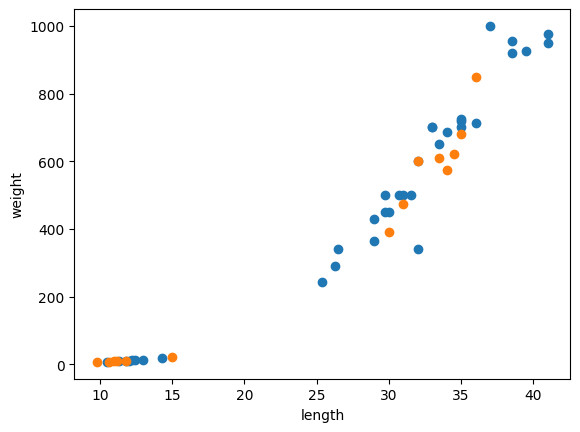

In [23]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [24]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [25]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [26]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [27]:
fish_data[:3]

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0]]

In [28]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [29]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state = 42)

In [30]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [31]:
kn.predict([[25,150]])

array([0.])

In [32]:
np.array(train_input)[:,0]

array([30. , 29. , 29.7, 11.3, 11.8, 13. , 32. , 30.7, 33. , 35. , 41. ,
       38.5, 25.4, 12. , 39.5, 29.7, 37. , 31. , 10.5, 26.3, 34. , 26.5,
       10.6,  9.8, 35. , 11.2, 31. , 34.5, 33.5, 15. , 34. , 30. , 11.8,
       32. , 36. , 11. ])

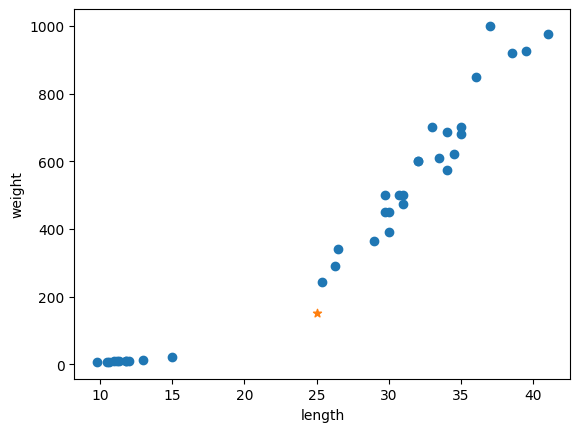

In [33]:
plt.scatter(np.array(train_input)[:,0], np.array(train_input)[:,1])
plt.scatter(25, 150, marker = '*')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

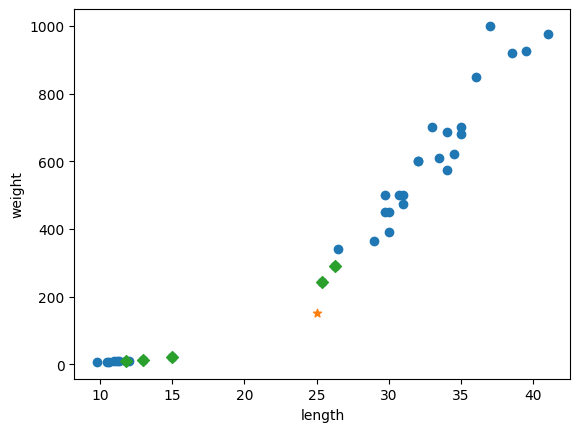

In [34]:
distances, indexes = kn.kneighbors([[25, 150]])

plt.scatter(np.array(train_input)[:,0], np.array(train_input)[:,1])
plt.scatter(25, 150, marker = '*')
plt.scatter(np.array(train_input)[indexes,0], np.array(train_input)[indexes,1],marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [35]:
np.array(train_input)[indexes], np.array(train_target)[indexes]

(array([[[ 25.4, 242. ],
         [ 15. ,  19.9],
         [ 13. ,  12.2],
         [ 26.3, 290. ],
         [ 11.8,  10. ]]]),
 array([[1., 0., 0., 1., 0.]]))

In [36]:
distances

array([[ 92.00086956, 130.48375378, 138.32150953, 140.00603558,
        140.62090883]])

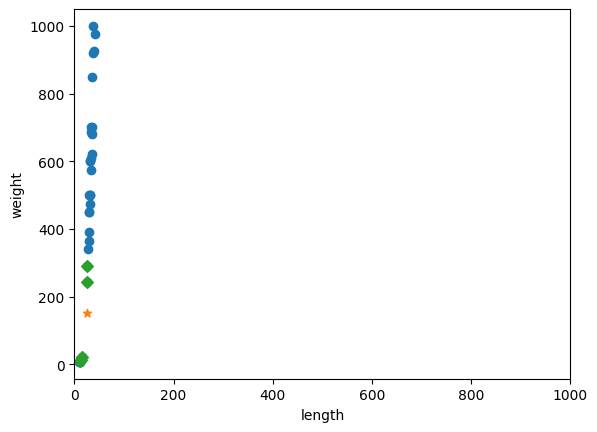

In [37]:
distances, indexes = kn.kneighbors([[25, 150]])

plt.scatter(np.array(train_input)[:,0], np.array(train_input)[:,1])
plt.scatter(25, 150, marker = '*')
plt.scatter(np.array(train_input)[indexes,0], np.array(train_input)[indexes,1],marker = 'D')
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [38]:
# 전처리(scaling)
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)
train_scaled = (train_input - mean) / std 

In [39]:
train_scaled[:3]

array([[ 0.37460577,  0.09920189],
       [ 0.27666962, -0.17125451],
       [ 0.34522492,  0.2546366 ]])

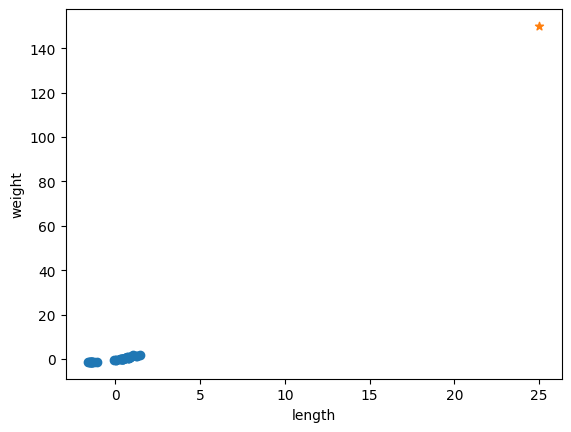

In [40]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker = '*')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

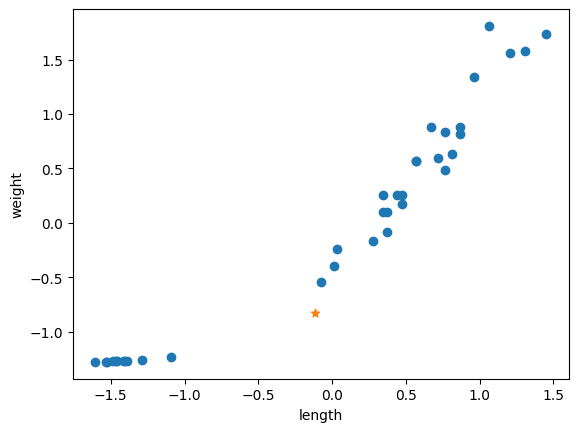

In [41]:
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker = '*')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

스케일링하기 전의 산점도와 유사함

다만 x,y축의 범위가 -1.5~1.5 사이로 바뀜

In [42]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [43]:
test_scaled = (test_input - mean) / std 

In [44]:
kn.score(test_scaled, test_target)

1.0

In [46]:
kn.predict([new])

array([1.])

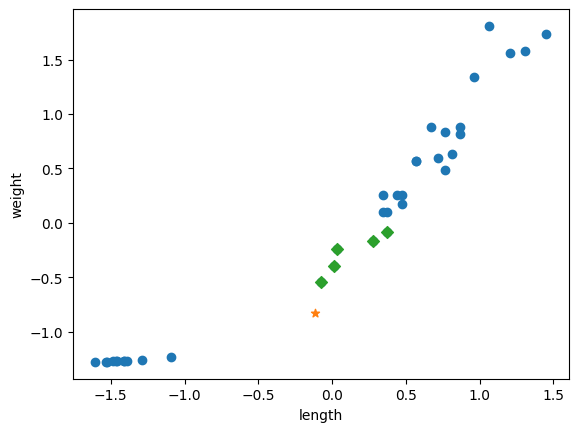

In [50]:
distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker = '*')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1],marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## k-최근접 이웃 회귀

가장 먼저, 가까운 k개의 이웃을 찾음. 그 다음 이웃샘플의 타깃값을 평균하여 샘플의 예측값으로 사용함

In [125]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

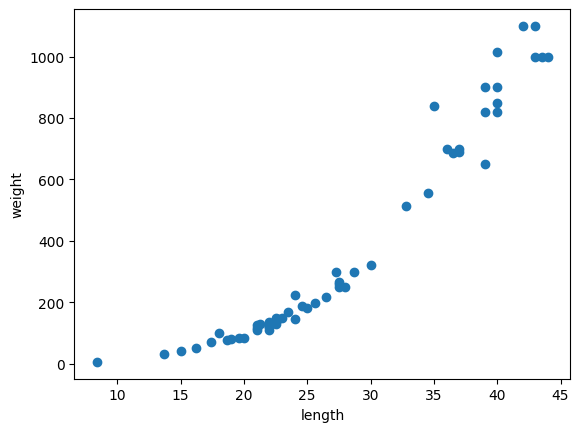

In [53]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [55]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

sklearn에서 사용할 훈련 세트는 2차원 배열이어야 함

train_input.reshape(42,1)

train_input.reshape(-1,1) : 나머지 원소 개수로 모두 채우라

In [56]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
train_input.shape, test_input.shape

((42, 1), (14, 1))

In [58]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
knr.score(test_input, test_target)

0.992809406101064

$R^2$: 결정계수. 1에 가까울수록 좋음

$$R^2 = 1 - \frac{\sum{(target-predict)^2}}{\sum{(target-mean)^2}}$$

예측이 평균정도를 예측하는 수준이라면 $R^2$는 0에 가까워지고,

예측이 타깃에 아주 가까워지면 $R^2$는 1에 가까워짐

In [59]:
from sklearn.metrics import mean_absolute_error
test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
mae

19.157142857142862

MAE: Mean Absolute Error, 타깃과 예측의 절대값 오차 평균

In [60]:
knr.score(train_input, train_target)

0.9698823289099254

k-최근접 이웃 알고리즘 모델을 더 복잡하게 만드는 방법은, 이웃의 개수 k를 줄이는 것
- 과대적합인 경우, 모델을 덜 복잡하게 만듦: 이웃의 개수 k를 늘리면 데이터 전반에 있는 일반적인 패턴을 따름
- 과소적합인 경우, 모델을 더 복잡하게 만듦: 이웃의 개수 k를 줄이면 훈련세트에 있는 국지적인 패턴에 민감해짐
- 기본값: k=5

In [61]:
knr.n_neighbors = 3
knr.fit(train_input, train_target)
knr.score(train_input, train_target)

0.9804899950518966

In [62]:
knr.score(test_input, test_target)

0.9746459963987609

## 선형회귀

In [63]:
knr.predict([[50]])

array([1033.33333333])

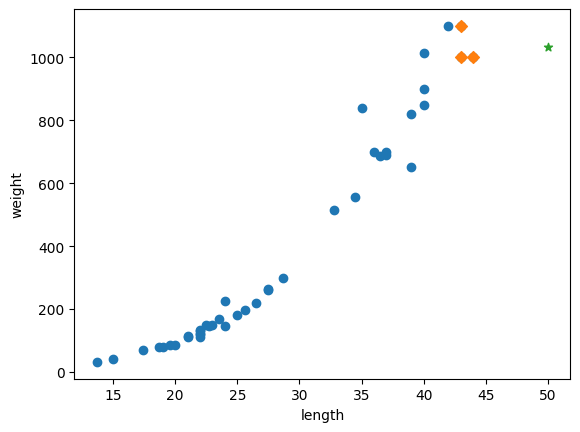

In [65]:
distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes],marker = 'D')

plt.scatter(50, 1033, marker = '*')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [67]:
np.mean(train_target[indexes])

1033.3333333333333

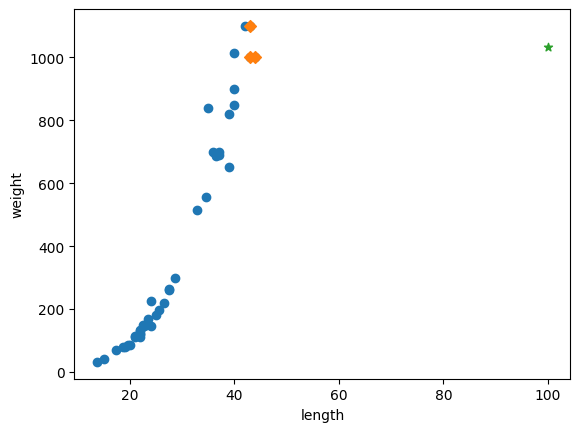

In [69]:
distances, indexes = knr.kneighbors([[100]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes],marker = 'D')

plt.scatter(100, 1033, marker = '*')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [102]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)
lr.predict([[50]])

array([1241.83860323])

In [103]:
lr.coef_, lr.intercept_

(array([39.01714496]), -709.0186449535474)

모델기반학습: 최적의 모델 파라미터를 찾음 ex) 선형회귀

vs 사례기반학습: 훈련세트를 저장함 (파라미터없음) ex) k-최근접이웃

In [104]:
15 * lr.coef_

array([585.25717445])

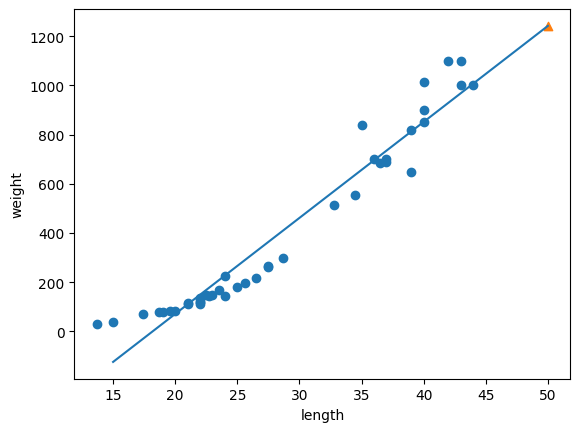

In [105]:
plt.scatter(train_input, train_target)

plt.plot([15, 50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])

plt.scatter(50, round(list(lr.predict([[50]]))[0],1), marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [106]:
lr.score(train_input, train_target), lr.score(test_input, test_target)

(0.9398463339976041, 0.824750312331356)

## 다항회귀
- 다항식을 사용한 선형회귀 (polynomial 다항식: 2차 이상의 방정식)

In [107]:
train_poly = np.column_stack((train_input **2, train_input))
test_poly = np.column_stack((test_input **2, test_input))
train_poly.shape, test_poly.shape

((42, 2), (14, 2))

In [108]:
train_input[:3], train_poly[:3]

(array([[19.6],
        [22. ],
        [18.7]]),
 array([[384.16,  19.6 ],
        [484.  ,  22.  ],
        [349.69,  18.7 ]]))

In [109]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
lr.predict([[50**2, 50]])

array([1573.98423528])

In [110]:
lr.coef_, lr.intercept_

(array([  1.01433211, -21.55792498]), 116.0502107827827)

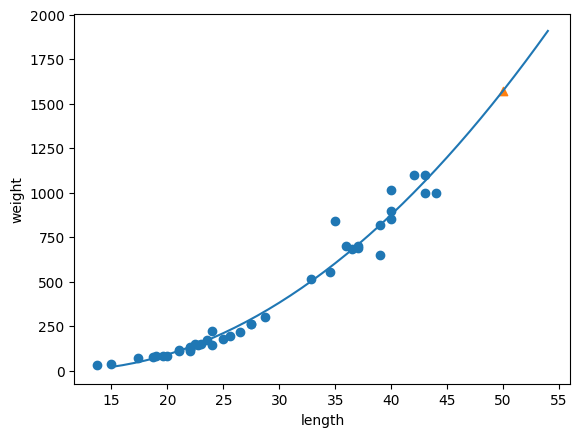

In [111]:
point = np.arange(15,55)

plt.scatter(train_input, train_target)

plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point + lr.intercept_)

plt.scatter(50, round(list(lr.predict([[50**2, 50]]))[0],1), marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [112]:
lr.score(train_poly, train_target), lr.score(test_poly, test_target)

(0.9706807451768623, 0.9775935108325122)

## 특성공학과 규제 (다중회귀)
- 여전히 훈련셋보다 테스트셋의 점수가 높은 점을 개선

## 다중회귀 multiple regression
- 여러 개의 특성을 사용한 선형회귀
- 특성공학: 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업

In [113]:
df = pd.read_csv('https://bit.ly/perch_csv_data')
df.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [116]:
perch_full = df.to_numpy()
perch_full[:3]

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43]])

In [126]:
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)

In [127]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit([[2,3]])
poly.transform([[2,3]])

array([[1., 2., 3., 4., 6., 9.]])

In [128]:
poly = PolynomialFeatures(include_bias = False)     # 절편항 제거
poly.fit([[2,3]])
poly.transform([[2,3]])

array([[2., 3., 4., 6., 9.]])

In [133]:
train_input[:3]

array([[19.6 ,  5.14,  3.04],
       [22.  ,  5.88,  3.52],
       [18.7 ,  5.2 ,  3.12]])

In [141]:
poly = PolynomialFeatures(include_bias = False)     # 절편항 제거, 변수 3개에 대한 상호작용텀, 등 추가
poly.fit(train_input)
train_poly = poly.transform(train_input)
train_poly.shape

(42, 9)

In [131]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [134]:
test_poly = poly.transform(test_input)

In [135]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)

0.9903183436982126

In [136]:
lr.score(test_poly, test_target)

0.9714559911594125

In [144]:
poly = PolynomialFeatures(degree = 5, include_bias = False)     # 5제곱항까지 특성 추가해봄
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
train_poly.shape

(42, 55)

In [145]:
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target), lr.score(test_poly, test_target)

(0.9999999999997232, -144.40564483377855)

특성의 개수를 크게 늘리면 선형모델은 과대적합되기 쉬움. 테스트셋에서 형편없게 됨

과대적합 줄이는 방법: 규제 regularization : 계수의 크기를 작게 만듦

- Ridge : 하이퍼파라미터 alpha: alpha값이 크면 규제강도가 세짐 / alpha값이 작으면 선형회귀모델과 유사해지므로 과대적합 가능성이 커짐

하이퍼파라미터: 사전에지정하는 값 

In [146]:
# 정규화 : StandardScaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [147]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
ridge.score(train_scaled, train_target)

0.9896101671037343

In [148]:
ridge.score(test_scaled, test_target)

0.9790693977615387

적절한 alpha값 찾기: $R^2$값의 그래프 그리기

In [149]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha = alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

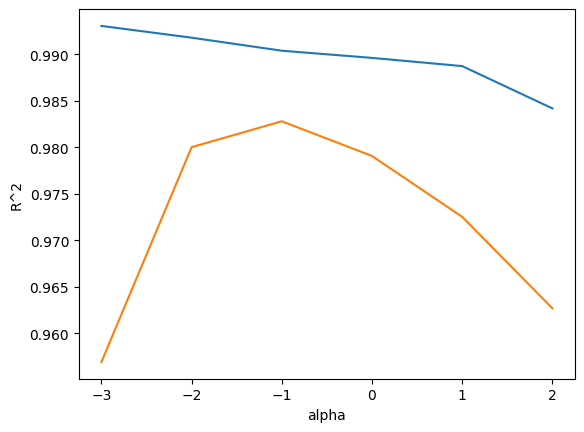

In [150]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

최적값: log(alpha) = -1

alpha = $10^{-1} = 0.1 $로 재학습

In [151]:
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
ridge.score(train_scaled, train_target), ridge.score(test_scaled, test_target)

(0.9903815817570367, 0.9827976465386928)

- Lasso : 

In [153]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
lasso.score(train_scaled, train_target), lasso.score(test_scaled, test_target)

(0.989789897208096, 0.9800593698421883)

In [156]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha = alpha, max_iter = 10000)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

c:\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
c:\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


지정한 반복횟수가 부족할 때 convergenceWarning 발생. 10000번이면 충분하다고 판단

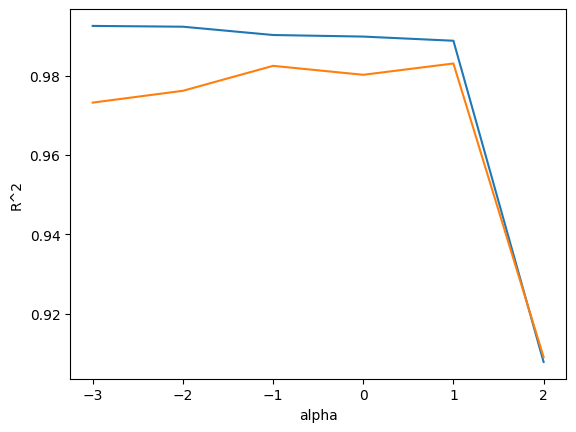

In [157]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

최적값 log(alpha) = 1

$ alpha = 10^1 = 10$ 

In [162]:
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)
lasso.score(train_scaled, train_target), lasso.score(test_scaled, test_target)

(0.9888067471131867, 0.9824470598706695)

In [164]:
# Lasso 모델은 계수값을 아예 0으로 만들 수 있음. 
np.sum(lasso.coef_ == 0)

40

55개의 특성을 모델에 주입했으나, 라쏘 모델이 사용한 특성은 40개를 제외한 15개에 불과.

라쏘 모델은 유용한 특성을 골라내는 용도로 사용 가능